Authored by: Diaa Abuhani

**(2) Bondary Measures** <br>

Boundary Measures attempts to study the extent in which two classes are separable by examining the existance and shape of the class boundary. Features dimensions are usually fused into a single value (e.g. distance metric) and evaluated as such. The following sections analyze different known boundary measures.



**2.1 Minimized sum of error distance by linear programming (noted as L1) And Linear Classifiers (noted as L2)**

Linear programming methods are usually used as a method to identify separable and nonseparble cases with the attempt to minimize an error function (e.g. MSE). In terms of classification complexity measure, we would like to maximize the distance between classes to figure out whither it is possible to find a hyperplane that would separate these classes.

Let us use the same Iris dataset used previously. Using linear programming we can define our objective to minimize the squared norm of the weight vector $w$ for instance.

$$
Minimize \quad \frac{1}{2} ||w||^2
$$

given the following constraints:

For each data point $(x_i,y_i)$ with class label $c_i$ (where $c_i$ is 1 for a class and -1 for other classes):

$$
c_i · (w ⋅x_i + b) \ge 1
$$

Note that there exists an equavelant maximizing objective such as aiming to maximize the margin between two classes:

$$
Maximize \quad Σ^n_i y_i
$$

given the same constraints but the literature proves that minimizing tends to be easier.

Also, one can make use of a Support Vector Classifier to address the same issue in a more efficient and advanced method.

In [36]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Load the Iris dataset
iris = load_iris()
X = iris.data
y_tar = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train LinearSVC on the full dataset
svm = LinearSVC(C=1e10)  # High C enforces hard-margin SVM
svm.fit(X_scaled, y_tar)

# Predictions on the full dataset
predictions = svm.predict(X_scaled)

# Calculate accuracy on the full dataset
accuracy = accuracy_score(y_tar, predictions)
print(f"L2 Score: {accuracy}")
print("Optimal weights (coefficients):", svm.coef_)
print("Optimal bias (intercept):", svm.intercept_)

L2 Score: 0.8666666666666667
Optimal weights (coefficients): [[-0.12690771  0.57416331 -0.87247262 -1.26205205]
 [ 0.28416238 -0.41576734  1.53269699 -0.75777714]
 [-1.35769978 -1.23841447  4.56704698  4.55997979]]
Optimal bias (intercept): [-0.91852723  0.40372565 -6.58812602]


small $L_1$ values indicate that the data set is linearly separable. The measure $L_1$ has its domain in the range [0, 1]. On the other hand, for an $L_2$ measure. A value of 0.86 clearly shows that the problem is almost linearly separable. To confirm these results, lets visualize the decision boundary using 2 features at a time. We know from the previous overlapping analysis that the first two features are less discriminating than the last two.

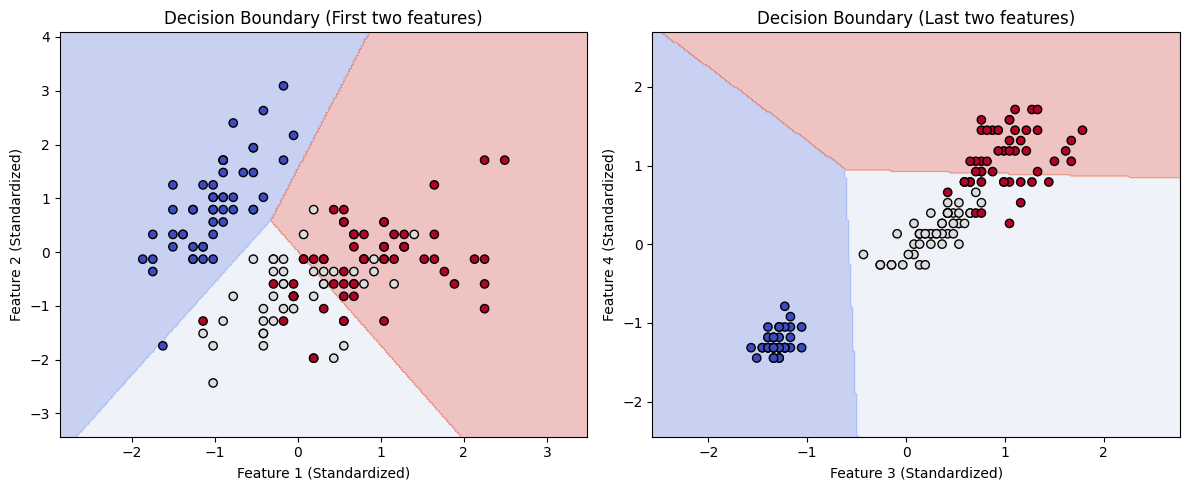

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Features for the first subplot (first two features)
X_selected_1 = X[:, :2]
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(X_selected_1)
svm_1 = LinearSVC(C=1e10)
svm_1.fit(X_scaled_1, y)

# Features for the second subplot (last two features)
X_selected_2 = X[:, 2:]
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_selected_2)
svm_2 = LinearSVC(C=1e10)
svm_2.fit(X_scaled_2, y)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first subplot
ax = axes[0]
h = .02  # Step size in the mesh
x_min, x_max = X_scaled_1[:, 0].min() - 1, X_scaled_1[:, 0].max() + 1
y_min, y_max = X_scaled_1[:, 1].min() - 1, X_scaled_1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X_scaled_1[:, 0], X_scaled_1[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_title('Decision Boundary (First two features)')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')

# Plot for the second subplot
ax = axes[1]
x_min, x_max = X_scaled_2[:, 0].min() - 1, X_scaled_2[:, 0].max() + 1
y_min, y_max = X_scaled_2[:, 1].min() - 1, X_scaled_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X_scaled_2[:, 0], X_scaled_2[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_title('Decision Boundary (Last two features)')
ax.set_xlabel('Feature 3 (Standardized)')
ax.set_ylabel('Feature 4 (Standardized)')

plt.tight_layout()
plt.show()

As we can see, it seems clear that Feature 3 and Feature 4 are better in terms of creating decision boundaries.

**2.2 Fraction of points on class boundary (noted as N1)**

$N_1$ is calculated by means of constructing a class-blind minimum spanning tree over the entire data set, counting the number of points incident to an edge which goes across classes. The minimum spanning tree connects all the points to their nearest neighbors (regardless of class) and the number of points connected to the opposite class by and edge are counted. These are considered to be points lying next to the class boundary. The fraction of such points over all points in the data set is used as measure. This metric provides an estimate of the length of the class boundary. The $N_1$ metric domain is [0, 1]. Large values of the measure indicate that the majority of points lay closely to the class boundary which could affect to the classifier to define the class boundary accurately

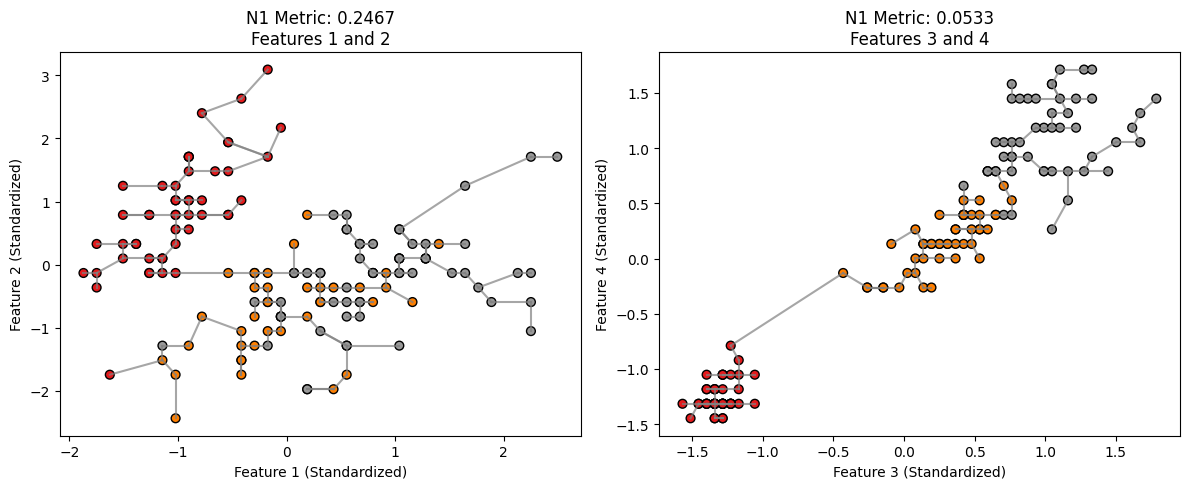

In [38]:
import numpy as np
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Features for the first subplot (first two features)
X_selected_1 = X[:, :2]
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(X_selected_1)

# Features for the second subplot (last two features)
X_selected_2 = X[:, 2:]
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_selected_2)

# Function to calculate N1 metric
def calculate_n1_metric(X_scaled):
    distances = distance.cdist(X_scaled, X_scaled)
    mst = minimum_spanning_tree(distances)
    num_points_opposite_class = np.zeros_like(mst.data)
    for i, (u, v) in enumerate(zip(*mst.nonzero())):
        num_points_opposite_class[i] = (y[u] != y[v])
    return np.sum(num_points_opposite_class) / len(X)

# Calculate N1 metric for the first subplot
n1_metric_1 = calculate_n1_metric(X_scaled_1)

# Calculate N1 metric for the second subplot
n1_metric_2 = calculate_n1_metric(X_scaled_2)

# Visualize the minimum spanning tree with points colored by class for both subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
ax = axes[0]
mst_1 = minimum_spanning_tree(distance.cdist(X_scaled_1, X_scaled_1))
ax.scatter(X_scaled_1[:, 0], X_scaled_1[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
for u, v in zip(*mst_1.nonzero()):
    ax.plot([X_scaled_1[u, 0], X_scaled_1[v, 0]], [X_scaled_1[u, 1], X_scaled_1[v, 1]], c='gray', alpha=0.7)
ax.set_title(f'N1 Metric: {n1_metric_1:.4f}\nFeatures 1 and 2')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')

# Second subplot
ax = axes[1]
mst_2 = minimum_spanning_tree(distance.cdist(X_scaled_2, X_scaled_2))
ax.scatter(X_scaled_2[:, 0], X_scaled_2[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
for u, v in zip(*mst_2.nonzero()):
    ax.plot([X_scaled_2[u, 0], X_scaled_2[v, 0]], [X_scaled_2[u, 1], X_scaled_2[v, 1]], c='gray', alpha=0.7)
ax.set_title(f'N1 Metric: {n1_metric_2:.4f}\nFeatures 3 and 4')
ax.set_xlabel('Feature 3 (Standardized)')
ax.set_ylabel('Feature 4 (Standardized)')

plt.tight_layout()
plt.show()

As we can see, the number of nodes connected to the other class using Feature 3 and 4 are much less than those connected using Feature 1 and 2. While this measure gives a good clarity on the complexity of the dataset. Nonetheless, it is difficult to visualize high dimensional data and thus I have to break it down into plusible dimensions.

**2.3 Ratio of average intra/inter class nearest neighbor distance (noted as N2)**

In the case of heavily interleaved or randomly labeled data, most of the points will appear next to the class boundary. The same can be true for a linearly separable problem with margins narrower that the distance between points of the same class. To check this situation, the N2 measure is proposed, which is closely related to the previous measure N1. In this case, we first compute the Euclidean distance from each point to its nearest neighbor within or outside the class. We then take the average of all the distances to intra-class nearest neighbors, and the average of all the distance to inter-class nearest neighbors. The ration of the two averages is used as measure N2.

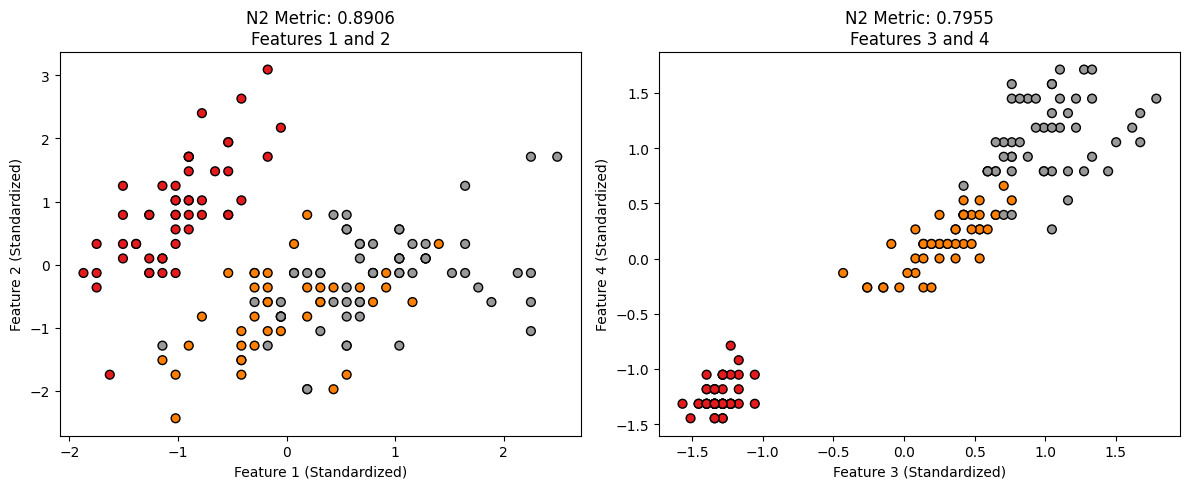

In [39]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Features for the first subplot (first two features)
X_selected_1 = X[:, :2]
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(X_selected_1)

# Features for the second subplot (last two features)
X_selected_2 = X[:, 2:]
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_selected_2)

# Function to calculate N2 metric
def calculate_n2_metric(X_scaled):
    # Compute nearest neighbors within the class
    knn_within_class = NearestNeighbors(n_neighbors=2).fit(X_scaled[y == 1])
    distances_within_class, _ = knn_within_class.kneighbors(X_scaled[y == 0])

    # Compute nearest neighbors outside the class
    knn_outside_class = NearestNeighbors(n_neighbors=2).fit(X_scaled[y == 0])
    distances_outside_class, _ = knn_outside_class.kneighbors(X_scaled[y == 1])

    # Calculate averages
    avg_within_class = np.mean(distances_within_class[:, 1])
    avg_outside_class = np.mean(distances_outside_class[:, 1])

    # Calculate N2 metric
    return avg_within_class / avg_outside_class

# Calculate N2 metric for the first subplot
n2_metric_1 = calculate_n2_metric(X_scaled_1)

# Calculate N2 metric for the second subplot
n2_metric_2 = calculate_n2_metric(X_scaled_2)

# Visualize nearest neighbors for both feature subsets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
ax = axes[0]
ax.scatter(X_scaled_1[:, 0], X_scaled_1[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'N2 Metric: {n2_metric_1:.4f}\nFeatures 1 and 2')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')

# Second subplot
ax = axes[1]
ax.scatter(X_scaled_2[:, 0], X_scaled_2[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'N2 Metric: {n2_metric_2:.4f}\nFeatures 3 and 4')
ax.set_xlabel('Feature 3 (Standardized)')
ax.set_ylabel('Feature 4 (Standardized)')

plt.tight_layout()
plt.show()

where, for each input instance exi, we calculate the distance to its nearest neighbor within the class (intraDist ($exi$)) and the distance to nearest neighbor of any other class (interDist ($exi$)). The result is the ratio of the sum of the intra-class distances to the sum of the inter-class distances for each input example, being N the number of examples in the data set. This measure compares the within-class spread to the size of the gap between classes. The domain of N2 metric is in the range [0, +∞]. Low values suggest that the examples of the same class lay closely in the feature space. Large ones indicate that examples of the same class are disperse.

**2.4 Error rate of 1 nearest neighbor classifier (noted as N3)**

This is the error rate of a nearest neighbor classifier considering the training set, estimated by the leave-one-out method. This measure shows how close the examples of different classes are. The $N_3$ metric has its range in the interval [0, 1]. Low values of this metric indicate that there is a large gap in the class boundary.

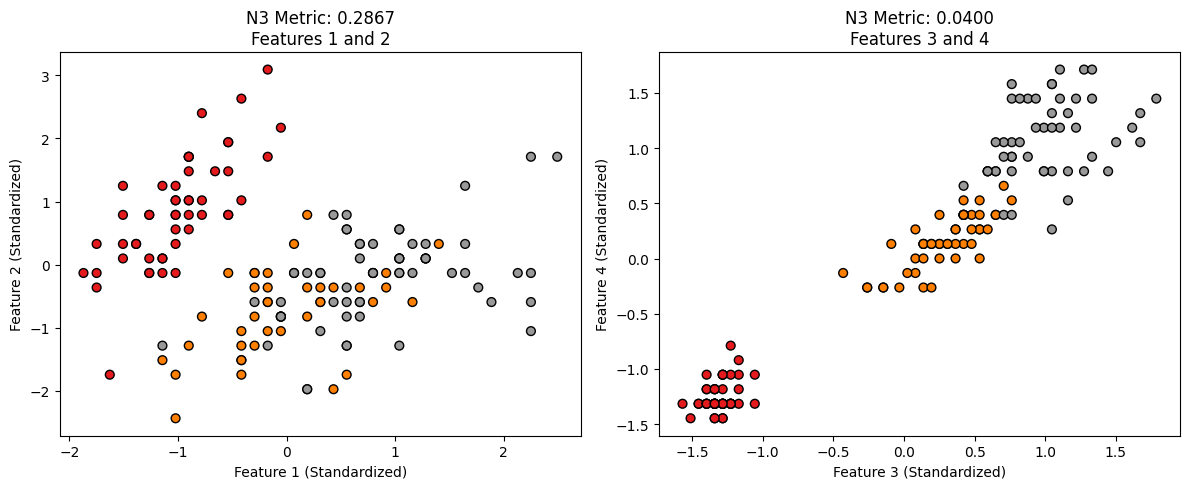

In [40]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Features for the first subplot (first two features)
X_selected_1 = X[:, :2]
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(X_selected_1)

# Features for the second subplot (last two features)
X_selected_2 = X[:, 2:]
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_selected_2)

# Function to calculate N3 metric
def calculate_n3_metric(X_scaled):
    loo = LeaveOneOut()
    knn = KNeighborsClassifier(n_neighbors=1)
    incorrect_predictions = 0

    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)

        if prediction != y_test:
            incorrect_predictions += 1

    return incorrect_predictions / len(X_scaled)

# Calculate N3 metric for the first subplot
n3_metric_1 = calculate_n3_metric(X_scaled_1)

# Calculate N3 metric for the second subplot
n3_metric_2 = calculate_n3_metric(X_scaled_2)

# Visualize N3 metrics for both feature subsets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
ax = axes[0]
ax.scatter(X_scaled_1[:, 0], X_scaled_1[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'N3 Metric: {n3_metric_1:.4f}\nFeatures 1 and 2')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')

# Second subplot
ax = axes[1]
ax.scatter(X_scaled_2[:, 0], X_scaled_2[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'N3 Metric: {n3_metric_2:.4f}\nFeatures 3 and 4')
ax.set_xlabel('Feature 3 (Standardized)')
ax.set_ylabel('Feature 4 (Standardized)')

plt.tight_layout()
plt.show()

The $N_3$ metric has its range in the interval [0, 1]. Low values of this metric indicate that there is a large gap in the class boundary.